In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets.widgets import interact, IntSlider
%matplotlib inline

pi = np.math.pi

def setLabels(lX, lY):
    plt.xlabel(lX)
    plt.ylabel(lY)

plt.rcParams['font.size'] = 40
plt.rcParams['figure.figsize'] = (40, 10)
plt.rcParams['lines.linewidth'] = 2.0

# Aufgabe 3: Diracimpuls

![Blockdiagramm](figures/A3/System_Blockdiagramm.png)

Ein LTI-System antwortet auf das Signal $x_1(t)  = \Lambda \left(\frac{t}{T} \right)$ mit dem Ausgangssignal 
    $y_1(t) = \frac{1}{2} \left(\Lambda \left(\frac{t}{T} \right) + \Lambda \left(\frac{t-T}{T} \right) \right)$.

## 3.1
Berechnen und skizzieren Sie die Impulsantwort $h(t)$ des Systems. Ist das System kausal?

#### Lösung im Zeitbereich (nur für einfache Fälle):
\begin{align}
    y_1(t)  = x_1(t) \ast h(t) &= \frac{1}{2} \left(\Lambda \left(\frac{t}{T} \right) + \Lambda \left(\frac{t-T}{T} \right) \right) \\
    & = \underbrace{\Lambda \left(\frac{t}{T} \right)}_{=x_1(t)} \ast \underbrace{\frac{1}{2}\left( \delta(t) + \delta(t-T) \right)}_{=h(t)} \\
    \Rightarrow h(t) &= \frac{1}{2}\left( \delta(t) + \delta(t-T) \right)
\end{align}  
  
Die Impulsantwort besteht aus zwei jeweils mit dem Faktor $w=1/2$ gewichteten Diracimpulsen bei $t=0$ und $t=T$. Durch das System wird also ein **gewichteter Mittelwert** zwischen dem momentanen und den um $T$ zurückliegenden Wert des Eingangssignals berechnet.  
Diese Struktur der Verrechnung von Signalwerten zu verschiedenen Zeitpunkten tritt in der Praxis in vielfältiger Weise auf. Beispiele sind:
 - Digitalfilter (dort wird das Signal aber nur zu den Abtastzeitpunkten ausgewertet).
 - Die Realisierung von Filtern in der HF-Technik oder Optik durch Laufzeitelemente wie z.B. Wellenleiter
 - Mehrwegeausbreitung bei der Signalübertragung

#### Graph der Impulsantwort $h(t)$

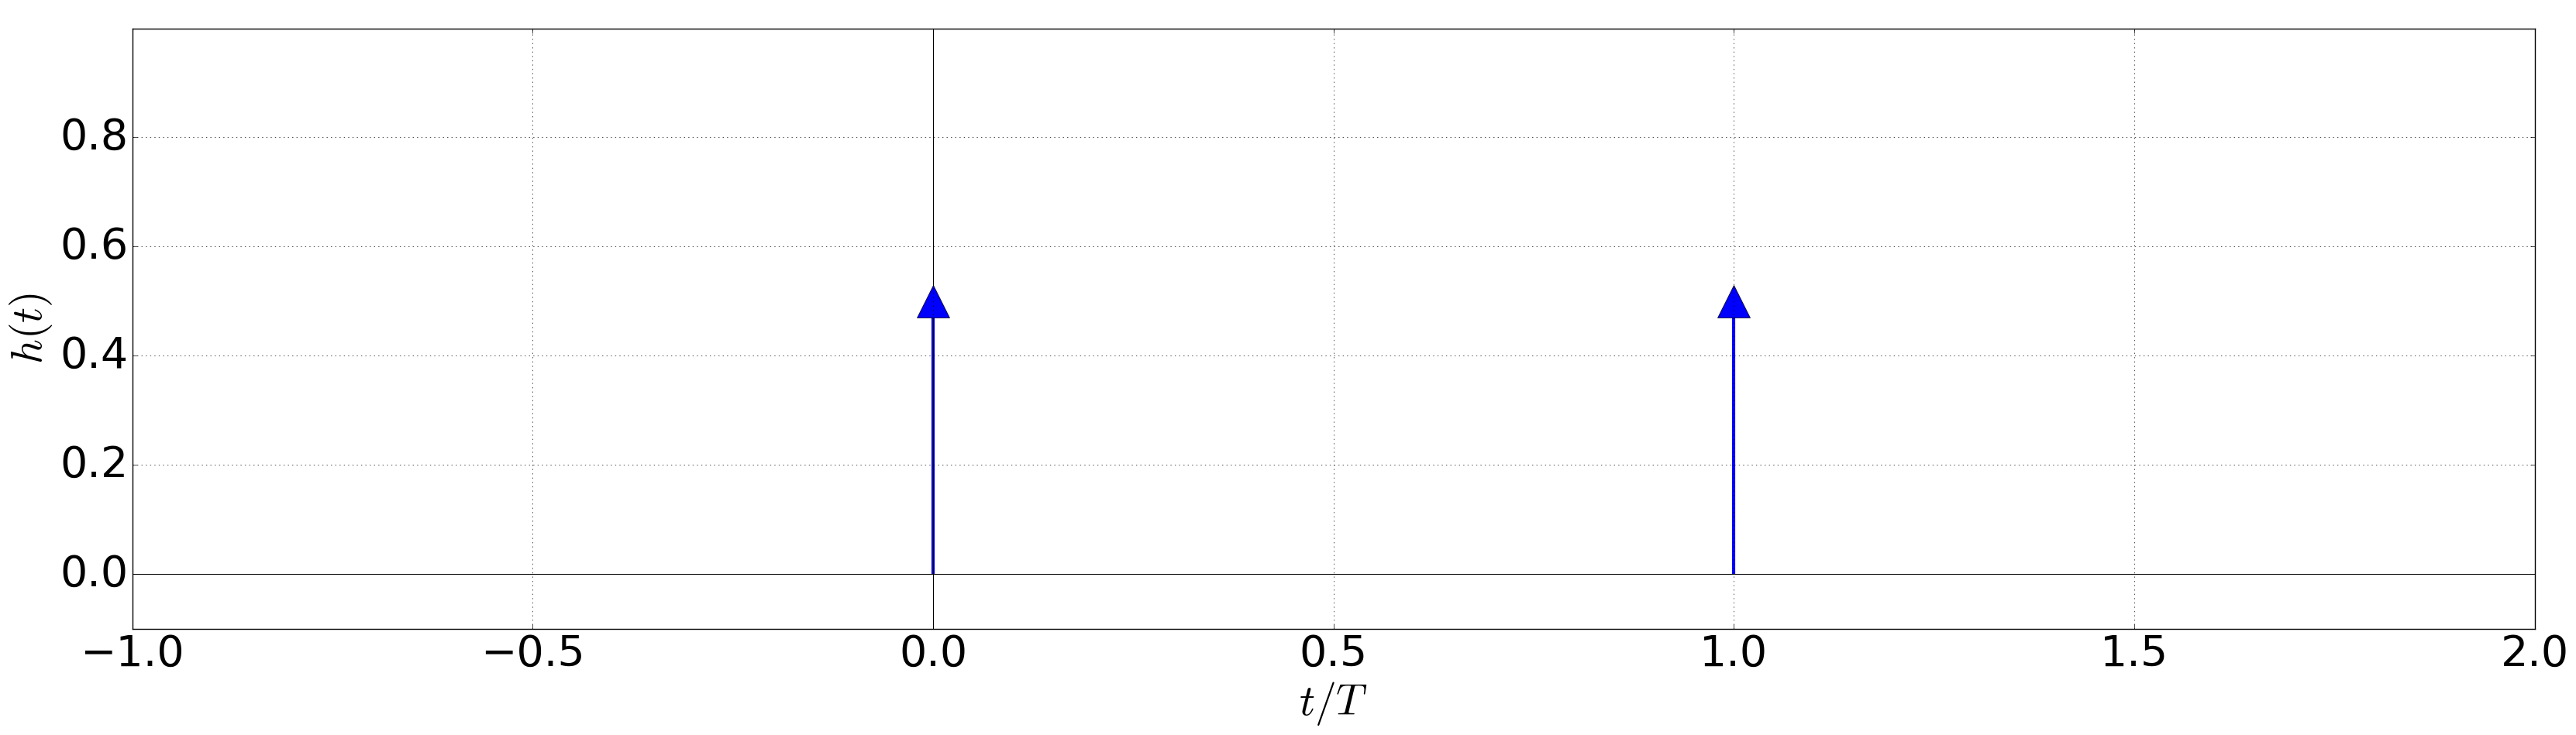

In [3]:
plt.axvline(lw=0.75, c='k')
plt.plot([0, 1], [1/2, 1/2], 'b^', ms=30)
plt.vlines([0, 1], 0, [1/2, 1/2], 'b', lw=3)
plt.axhline(lw=0.75, c='k')
setLabels(r'$t/T$', r'$h(t)$')
plt.xlim((-1, 2))
plt.ylim((-0.1, 1))
plt.grid(True)

Das System ist kausal, da $h(t) = 0$ für $t < 0$.

#### Lösung im Frequenzbereich (allgemeingültiger):

Für LTI-Systeme gilt im Frequenzbereich: $Y(j\omega) = H(j\omega) X(j\omega)$. Liegen beide Fouriertransformierten vor, kann die Übertragungsfunktion also durch Division bestimmt werden. Die Impulsantwort lässt sich dann durch Rücktransformation ermitteln: $h(t) = \mathcal{F}^{-1} \left \{ H(j \omega) \right \}$.

\begin{align}
    X_1(j\omega) &= \mathcal{F}\left\{x_1(t)\right\}  = \mathcal{F}\left\{\Lambda \left(\frac{t}{T} \right)\right\} = T \mathrm{si}^2\left(\frac{\omega T}{2}\right)
\end{align}

Bei der Tranformation des Ausgangssignals kann entweder über den Faltungssatz und das Transformationspaar $\mathcal{F}\left\{\delta(t-t_0)\right\} = \mathrm{e}^{-j\omega t_0}$  oder direkt über den Verschiebungssatz erfolgen: $\qquad \mathcal{F}\left  \{ x(t - t_0) \right \} = \mathcal{F}\left  \{ x(t) \ast \delta(t - t_0) \right \} = X(j\omega)\mathrm{e}^{-j\omega t_0}$.



\begin{align}
    Y_1(j\omega) &= \mathcal{F}\left\{y_1(t)\right\}  \\
    &= \mathcal{F}\left\{\frac{1}{2} \left(\Lambda \left(\frac{t}{T} \right) + \Lambda \left(\frac{t-T}{T} \right) \right)\right\} \\
    &= \frac{T}{2} \left( \mathrm{si}^2\left(\frac{\omega T}{2}\right) + \mathrm{si}^2\left(\frac{\omega T}{2}\right) \mathrm{e}^{-j\omega T} \right) \\
    &= \underbrace{T \mathrm{si}^2\left(\frac{\omega T}{2}\right)}_{=X_1(j\omega)} \cdot \underbrace{\frac{1}{2}\left( 1 + \mathrm{e}^{-j\omega T} \right)}_{=H(j\omega)} \\[1em]
    \Rightarrow H(j\omega) &= \frac{Y_1(j \omega)}{X_1(j\omega)} = \frac{1}{2}\left( 1 + \mathrm{e}^{-j\omega T} \right) \\
    h(t) &= \mathcal{F}^{-1}\left\{ H(j\omega)\right\} = \frac{1}{2}\left( \delta(t) + \delta(t-T) \right)
\end{align}
  
Die Übertragungsfunktion ist periodisch in $\omega$. Sie hat den Wert 1 für $\omega = 2k \frac{\pi}{T}$ und den Wert 0 für $\omega = (2k+1)\cdot \frac{\pi}{T}$ mit $k \in \mathbb{Z}$.  
Beschränkt man sich auf den Frequenzbereich $\omega \in \left[ -\frac{\pi}{T}, \frac{\pi}{T} \right]$, stellt das System einen (sehr breitbandigen) Tiefpass dar. Mittelwertbilder ergeben im Allgemeinen immer einen Tiefpass, da der Mittelwert eines konstantes Signals (reiner Gleichanteil, $\omega = 0$) das Signal selbst ist und es deshalb unverändert durchgelassen wird.


#### Graph des Betrags der Übertragungsfunktion $|H(j\omega)|$

Der Betragsfrequenzgang des resultierenden Systems ist eine gerade periodische Funktion:
\begin{align}
    \left| H(j\omega) \right| = \sqrt{H(j\omega)\cdot H^{\ast}(j\omega)} &= \sqrt{\frac{1}{2}\left( 1 + \mathrm{e}^{-j\omega T} \right) \cdot \frac{1}{2}\left( 1 + \mathrm{e}^{j\omega T} \right)} \\
    &= \frac{1}{2} \sqrt{1 + \mathrm{e}^{j\omega T} + \mathrm{e}^{-j\omega T} + 1} \\
    &= \frac{1}{2} \sqrt{2 + 2 \cos\left(\omega T\right)}
\end{align}  
Der Verlauf ist zwar stetig, aber nicht glatt.

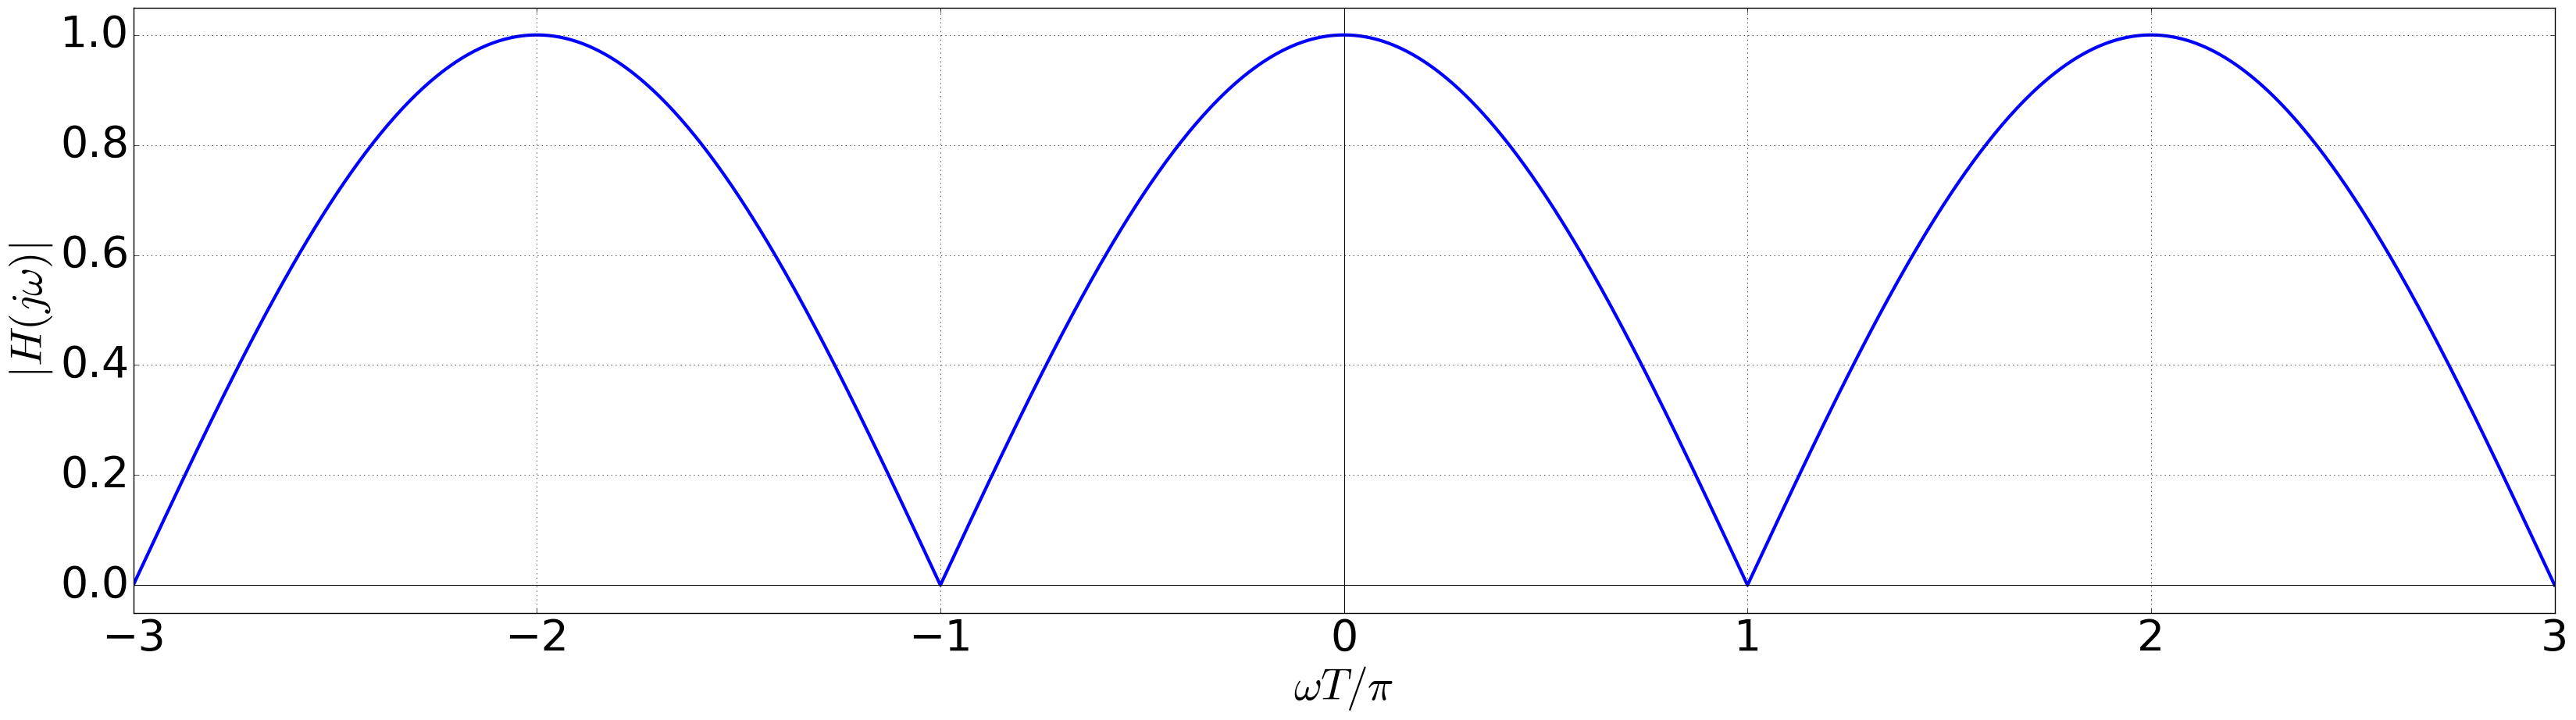

In [4]:
wT = np.linspace(-3*pi, 3*pi, 1000)
H = 1/2*(1 + np.exp(-1j*wT))

plt.axvline(lw=0.75, c='k')
plt.plot(wT/pi, np.abs(H), lw=3)
plt.axhline(lw=0.75, c='k')
setLabels(r'$\omega T/\pi$', r'$|H(j\omega)|$')
plt.ylim((-0.05, 1.05))
plt.grid(True)

## 3.2:
Berechnen sie die Antwort $y_2(t)$ des Systems auf das Engangssignal mit der Fouriertransformierten $X_2(j\omega) = \pi \left(\delta\left(\omega - \frac{\pi}{T}\right) +  \delta \left(\omega + \frac{\pi}{T}\right) \right)$.

#### Spektrum des Eingangssignals

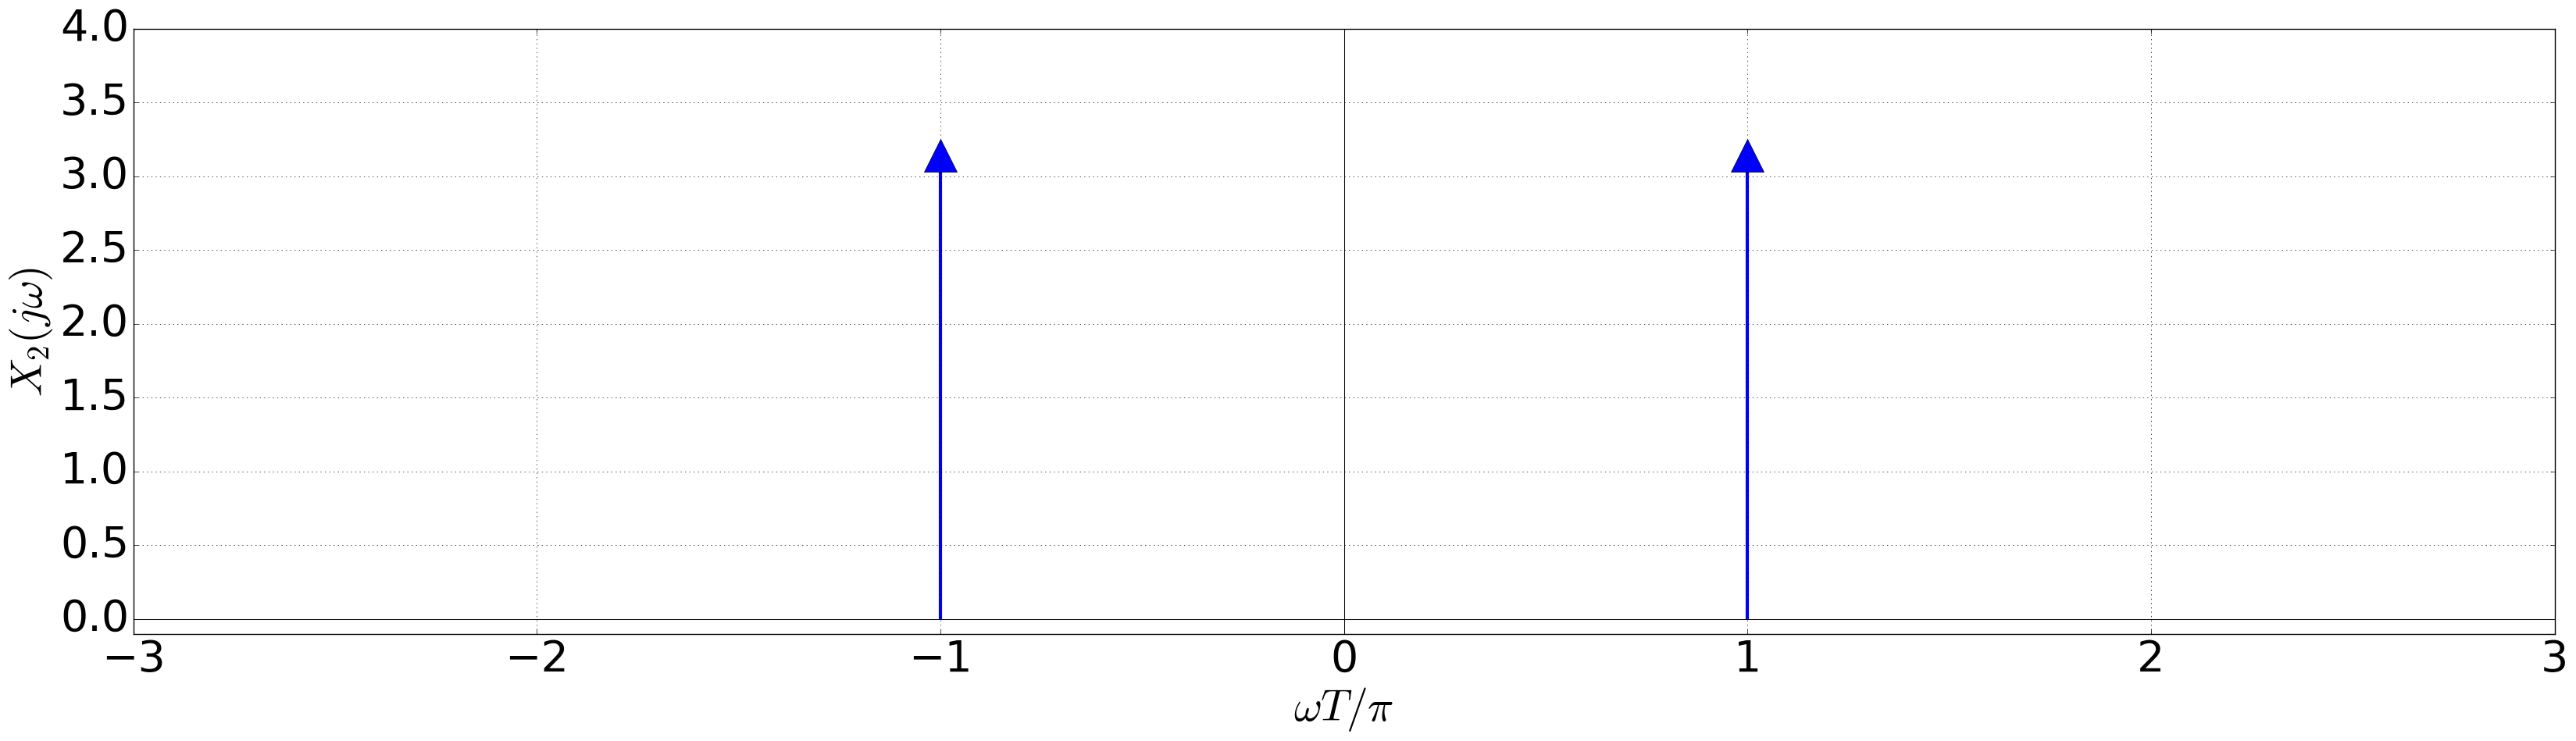

In [5]:
plt.axvline(lw=0.75, c='k')
plt.plot([-1, 1], [pi, pi], 'b^', ms=30)
plt.vlines([-1, 1], 0, [pi, pi], 'b', lw=3)
plt.axhline(lw=0.75, c='k')
setLabels(r'$\omega T/\pi$', r'$X_2(j\omega)$')
plt.xlim((-3, 3))
plt.ylim((-0.1, 4))
plt.grid()

#### Lösung im Zeitbereich:
\begin{align}
    x_2(t) &= \mathcal{F}^{-1}\left\{X_2(j\omega)\right\} = \cos\left(\frac{\pi t}{T}\right) \\
    y_2(t) &= x_2(t) \ast h(t) = \cos\left(\frac{\pi t}{T}\right) \ast \frac{1}{2}\left( \delta(t) + \delta(t-T) \right) \\
        &= \frac{1}{2}\left( \cos\left(\frac{\pi t}{T}\right) + \cos\left(\frac{\pi (t-T)}{T}\right) \right) \\
        &= \frac{1}{2}\left( \cos\left(\frac{\pi t}{T}\right) + \cos\left(\frac{\pi t}{T} -  \pi \right) \right)
\end{align}

Mit $\cos(\phi - \pi) = -\cos(\phi)$ ergibt sich:
\begin{align}
    y_2(t) &= \frac{1}{2}\left( \cos\left(\frac{\pi t}{T}\right) - \cos\left(\frac{\pi t}{T}\right)  \right) \\
    &= 0 \quad \forall t
\end{align}

#### Lösung im Frequenzbereich:
\begin{align}
    Y_2(j\omega) &= X_2(j\omega) \cdot H(j\omega) \\
    &= \pi \left(\delta\left(\omega - \frac{\pi}{T}\right) +  \delta\left(\omega + \frac{\pi}{T}\right) \right) \cdot \frac{1}{2}\left( 1 + \mathrm{e}^{-j\omega T} \right) \\
    & = \frac{\pi}{2} \left(\delta\left(\omega - \frac{\pi}{T}\right)\cdot \left( 1 + \mathrm{e}^{-j\frac{\pi}{T} T} \right)  +  \delta\left(\omega + \frac{\pi}{T}\right)\cdot \left( 1 + \mathrm{e}^{j\frac{\pi}{T}T} \right) \right) \\
    & = \frac{\pi}{2} \left(\delta\left(\omega - \frac{\pi}{T}\right)\cdot \underbrace{\left( 1 + \mathrm{e}^{-j\pi} \right)}_{=0}  +  \delta\left(\omega + \frac{\pi}{T}\right)\cdot \underbrace{\left( 1 + \mathrm{e}^{j\pi} \right)}_{=0} \right) \quad = 0 \\[1em]
    \Rightarrow y_2(t) &= \mathcal{F}^{-1}\left\{0\right\} = 0.
\end{align}

#### Erklärung über den Zeitbereich:
Durch das System wird das Eingangssignal mit einer um die Phase $\pi$ verschobenen Version von sich selbst addiert. Dadurch ergibt sich destruktive Interferenz und das Ausgangssignal verschwindet.  
#### Erklärung über den Frequenzbereich:
Die vorgegebene Kosinusschwingung enthält lediglich die Frequenzen $-\pi/T$ und $\pi/T$.
Die Übertragungsfunktion des Systems hat Nullstellen an diesen Frequenzen, weshalb das Eingangssignal komplett unterdrückt wird.

## 3.3 
Wie lautet die Antwort $y_3(t)$ des Systems auf das Eingangssignal $x_3(t) = \delta(bt)$, wobei $b \neq 0$ ist? Skizzieren Sie das Ausgangssignal $y_3(t)$.

#### Auflösen von $\delta(bt)$:
\begin{align}
    &\mathcal{F}^{-1}\left\{ \mathcal{F}\left\{ \delta(bt) \right\} \right\} 
    \underset{\text{Ähnl.-Satz}}{=} \mathcal{F}^{-1} \left\{ \frac{1}{|b|} \cdot 1\right \} = \frac{1}{|b|}\delta(bt) \\[1em]
    \Rightarrow &\delta(bt) = \frac{1}{|b|}\delta(bt)
\end{align}
#### Lösung im Zeitbereich:
\begin{align}
    y_3(t)  = h(t) \ast x_3(t) &= \frac{1}{2}\left( \delta(t) + \delta(t-T) \right) \ast \frac{1}{|b|}\delta(bt) \\
    &= \frac{1}{2|b|}\left( \delta(t) + \delta(t-T) \right)
    \end{align}

Auch hier ist sehr gut zu sehen, dass das Eingangssignal durch das System wiederholt wird.

#### Graph von $y_3(t)$ für $|b| = 2$

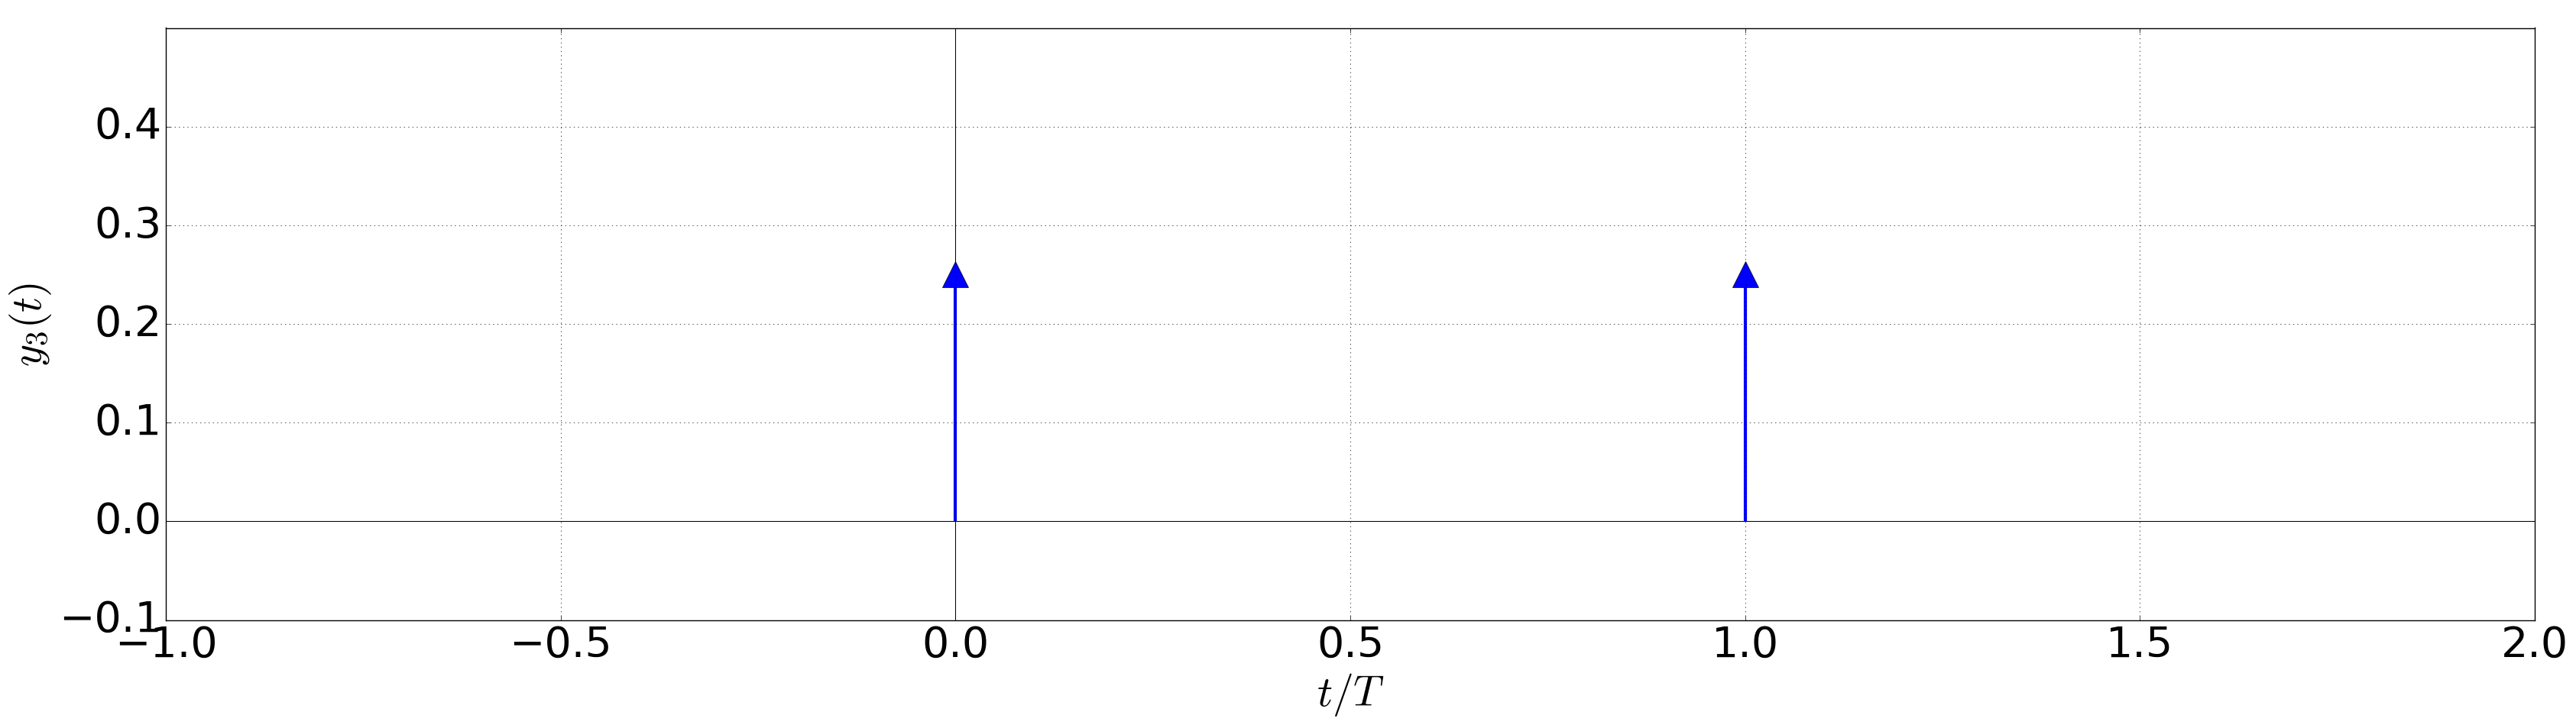

In [6]:
plt.axvline(lw=0.75, c='k')
plt.plot([0, 1], [1/4, 1/4], 'b^', ms=25)
plt.vlines([0, 1], 0, [1/4, 1/4], 'b', lw=3)
plt.axhline(lw=0.75, c='k')
setLabels(r'$t/T$', r'$y_3(t)$')
plt.xlim((-1, 2))
plt.ylim((-0.1, 0.5))
plt.grid(True)

## 3.4 Kaskadierung von Systemen
![Blockdiagramm](figures/A3/System_Blockdiagramm_kaskadiert.png)

Wie lautet die Gesamtübertragungsfunktion $G(j\omega)$?

Bei Hintereinanderschaltung von zwei LTI-Systemen resultiert die Gesamtübertragungsfunktion als Produkt der Einzelübertragungsfunktionen:

\begin{align}
    G(j\omega) &= H(j\omega)\cdot H(j\omega) \\
    &= \frac{1}{2}\left( 1 + \mathrm{e}^{-j\omega T} \right) \cdot \frac{1}{2}\left( 1 + \mathrm{e}^{-j\omega T} \right) \\
    &= \frac{1}{4}\left( 1 + 2\mathrm{e}^{-j\omega T} + \mathrm{e}^{-j2\omega T} \right)
\end{align}  
  
Die Übertragungsfunktion besteht wieder nur aus einer gewichteten Summe von frequenzabhängigen Phasenverschiebungstermen.

#### Graph von $|G(j\omega)|$

\begin{align}
    \left|G(j\omega) \right|  = \sqrt{G(j\omega) \cdot G^{\ast}(j\omega)} &= \sqrt{\frac{1}{4}\left( 1 + 2\mathrm{e}^{-j\omega T} + \mathrm{e}^{-j2\omega T} \right) \cdot \frac{1}{4}\left( 1 + 2\mathrm{e}^{j\omega T} + \mathrm{e}^{j2\omega T} \right)} \\
    &= \frac{1}{4} \sqrt{ 1 + 2\mathrm{e}^{-j\omega T} + \mathrm{e}^{-j2\omega T} + 2\mathrm{e}^{-j2\omega T} + 4 + 2\mathrm{e}^{j2\omega T} + \mathrm{e}^{j2\omega T} + 2\mathrm{e}^{j\omega T} + 1 } \\
    &= \frac{1}{4} \sqrt{6 + 8\cos\left(\omega T\right) + 2\cos \left( 2 \omega T \right)}
\end{align}  
  
Der Frequenzgang hat also wieder den Betrag 1 bei $\omega = 2k\cdot \frac{\pi}{T} $ und Nullstellen bei $\omega  = (2k+1) \cdot \frac{\pi}{T}$. Der Verlauf ist jedoch glatter und steiler um die Maxima geworden.

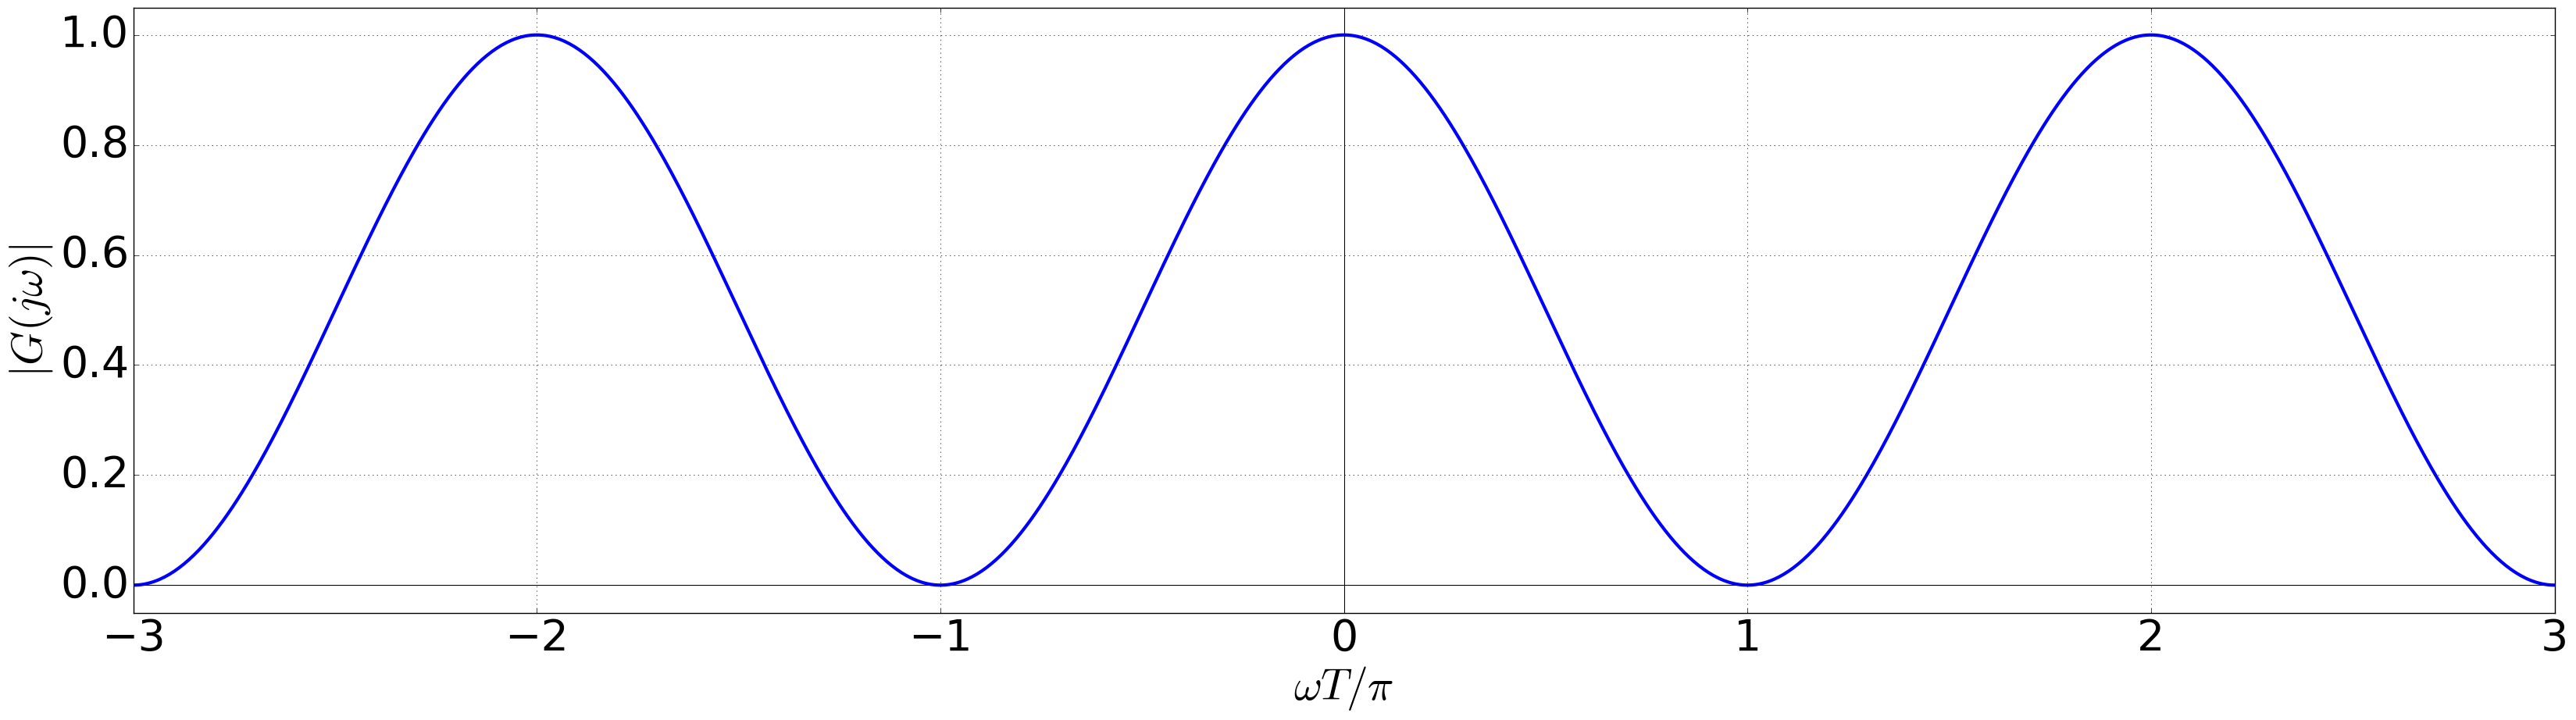

In [7]:
G = H*H
plt.axvline(lw=0.75, c='k')
plt.plot(wT/pi, np.abs(G), lw=3)
plt.axhline(lw=0.75, c='k')
setLabels(r'$\omega T/\pi$', r'$|G(j\omega)|$')
plt.ylim((-0.05, 1.05))
plt.grid(True)

## 3.6 Kausalität und Impulsantwort 
Ist das System kausal? Berechnen sie die Impulsantwort $g(t)$ des Systems einmal durch Rücktransformation und einmal direkt im Zeitbereich.

#### Kausalität:
Das System ist kausal, da eine beliebige Verschaltung kausaler Systeme immer ein kausales System ergibt.

#### Impulsantwort durch Faltung im Zeitbereich:
\begin{align}
    g(t) &= h(t) \ast h(t) \\
    &= \frac{1}{2}\left( \delta(t) + \delta(t-T) \right) \ast \frac{1}{2}\left( \delta(t) + \delta(t-T) \right) \\
    &= \frac{1}{4}\left( \delta(t) \ast \delta(t) + \delta(t) \ast \delta(t-T) + \delta(t-T) \ast \delta(t) + \delta(t-T) \ast \delta(t-T) \right) \\
    &= \frac{1}{4}\left( \delta(t) + 2\delta(t-T) + \delta(t-2T) \right)
\end{align}

#### Impulsantwort durch Rücktransformation:
\begin{align}
    g(t) &= \mathcal{F}^{-1}\left\{ G(j\omega)\right\} \\
         &= \mathcal{F}^{-1}\left\{ \frac{1}{4}\left( 1 + 2\mathrm{e}^{-j\omega T} + \mathrm{e}^{-j2\omega T}
         \right) \right\} \\
         &= \frac{1}{4}\left( \delta(t) + 2\delta(t-T) + \delta(t-2T) \right)
\end{align}  
Das resultierende System führt also wieder eine gewichtete Mittelung zwischen Werten des Eingangssignals zu verschiedenen Zeitpunkten durch. Die Gewichtungsfaktoren haben einen dreieckförmigen Verlauf.

#### Graph der Impulsantwort $g(t)$:

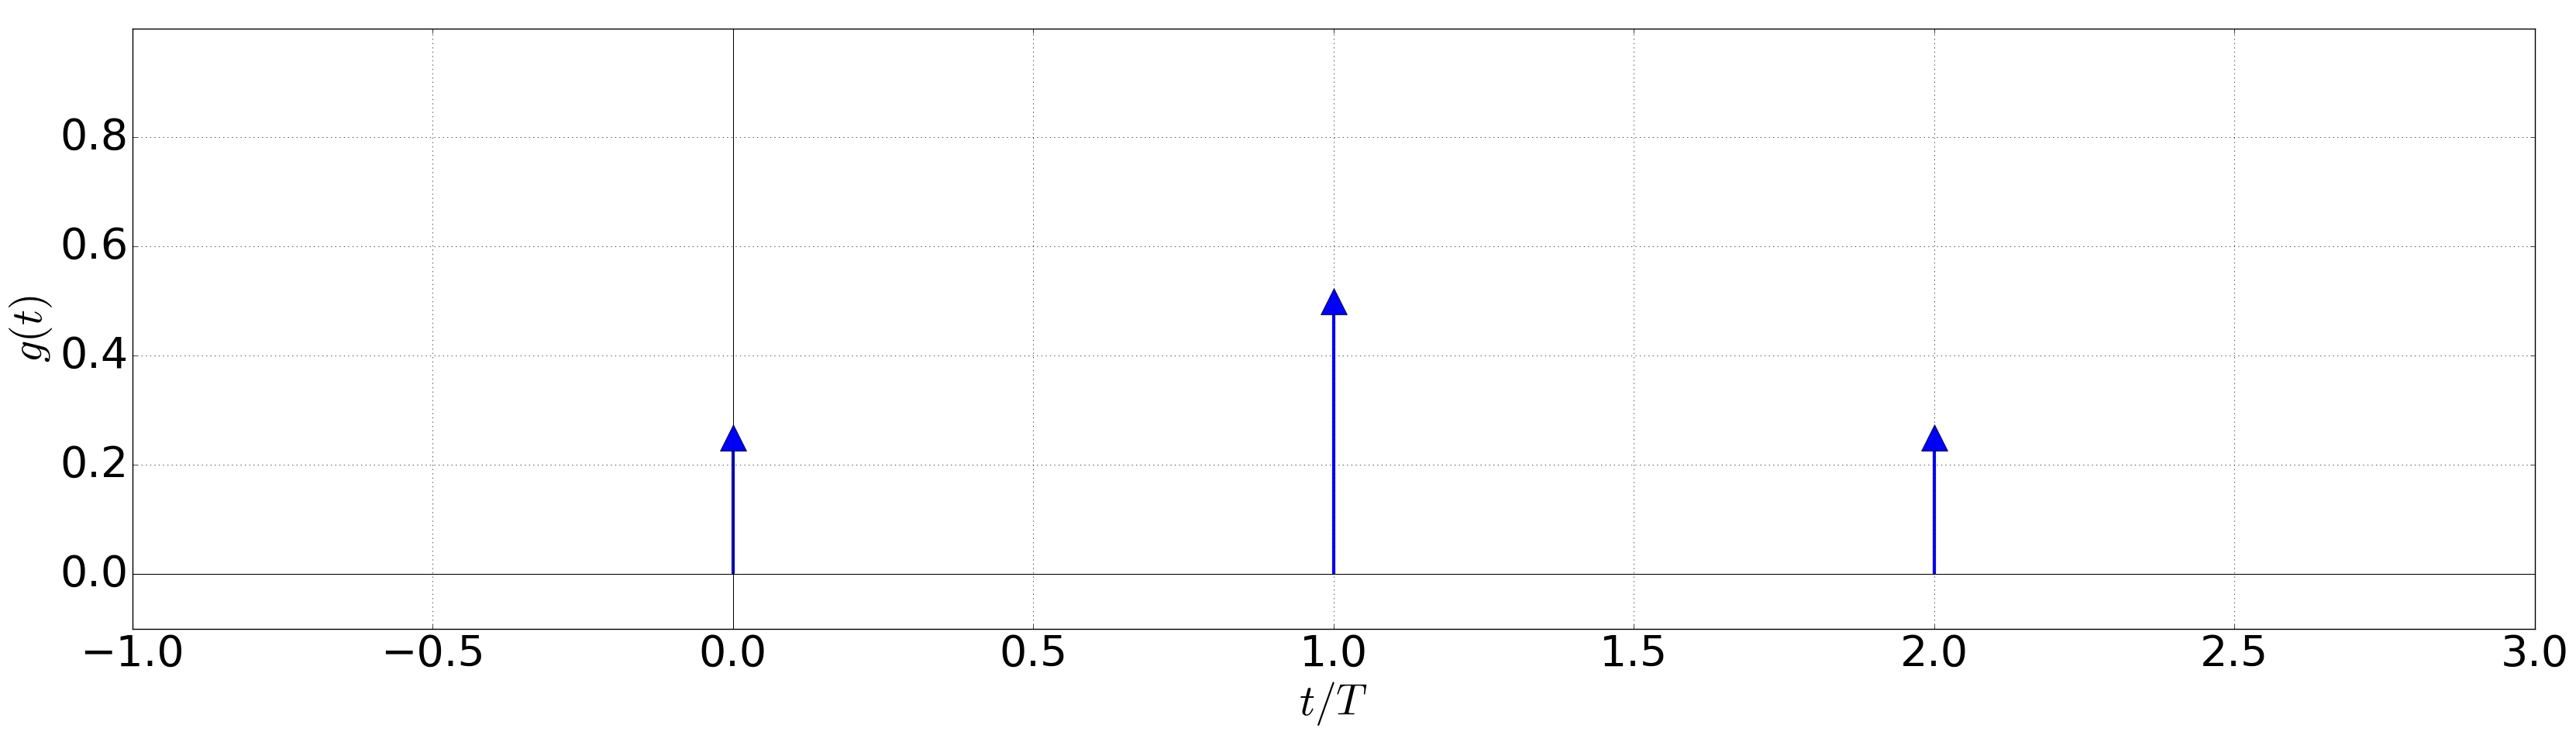

In [8]:
plt.axvline(lw=0.75, c='k')
plt.plot([0, 1, 2], [1/4, 1/2, 1/4], 'b^', ms=25)
plt.vlines([0, 1, 2], 0, [1/4, 1/2, 1/4], 'b', lw=3)
plt.axhline(lw=0.75, c='k')
setLabels(r'$t/T$', r'$g(t)$')
plt.xlim((-1, 3))
plt.ylim((-0.1, 1))
plt.grid(True)

### Zusatz: Kaskadierung beliebig vieler Systeme

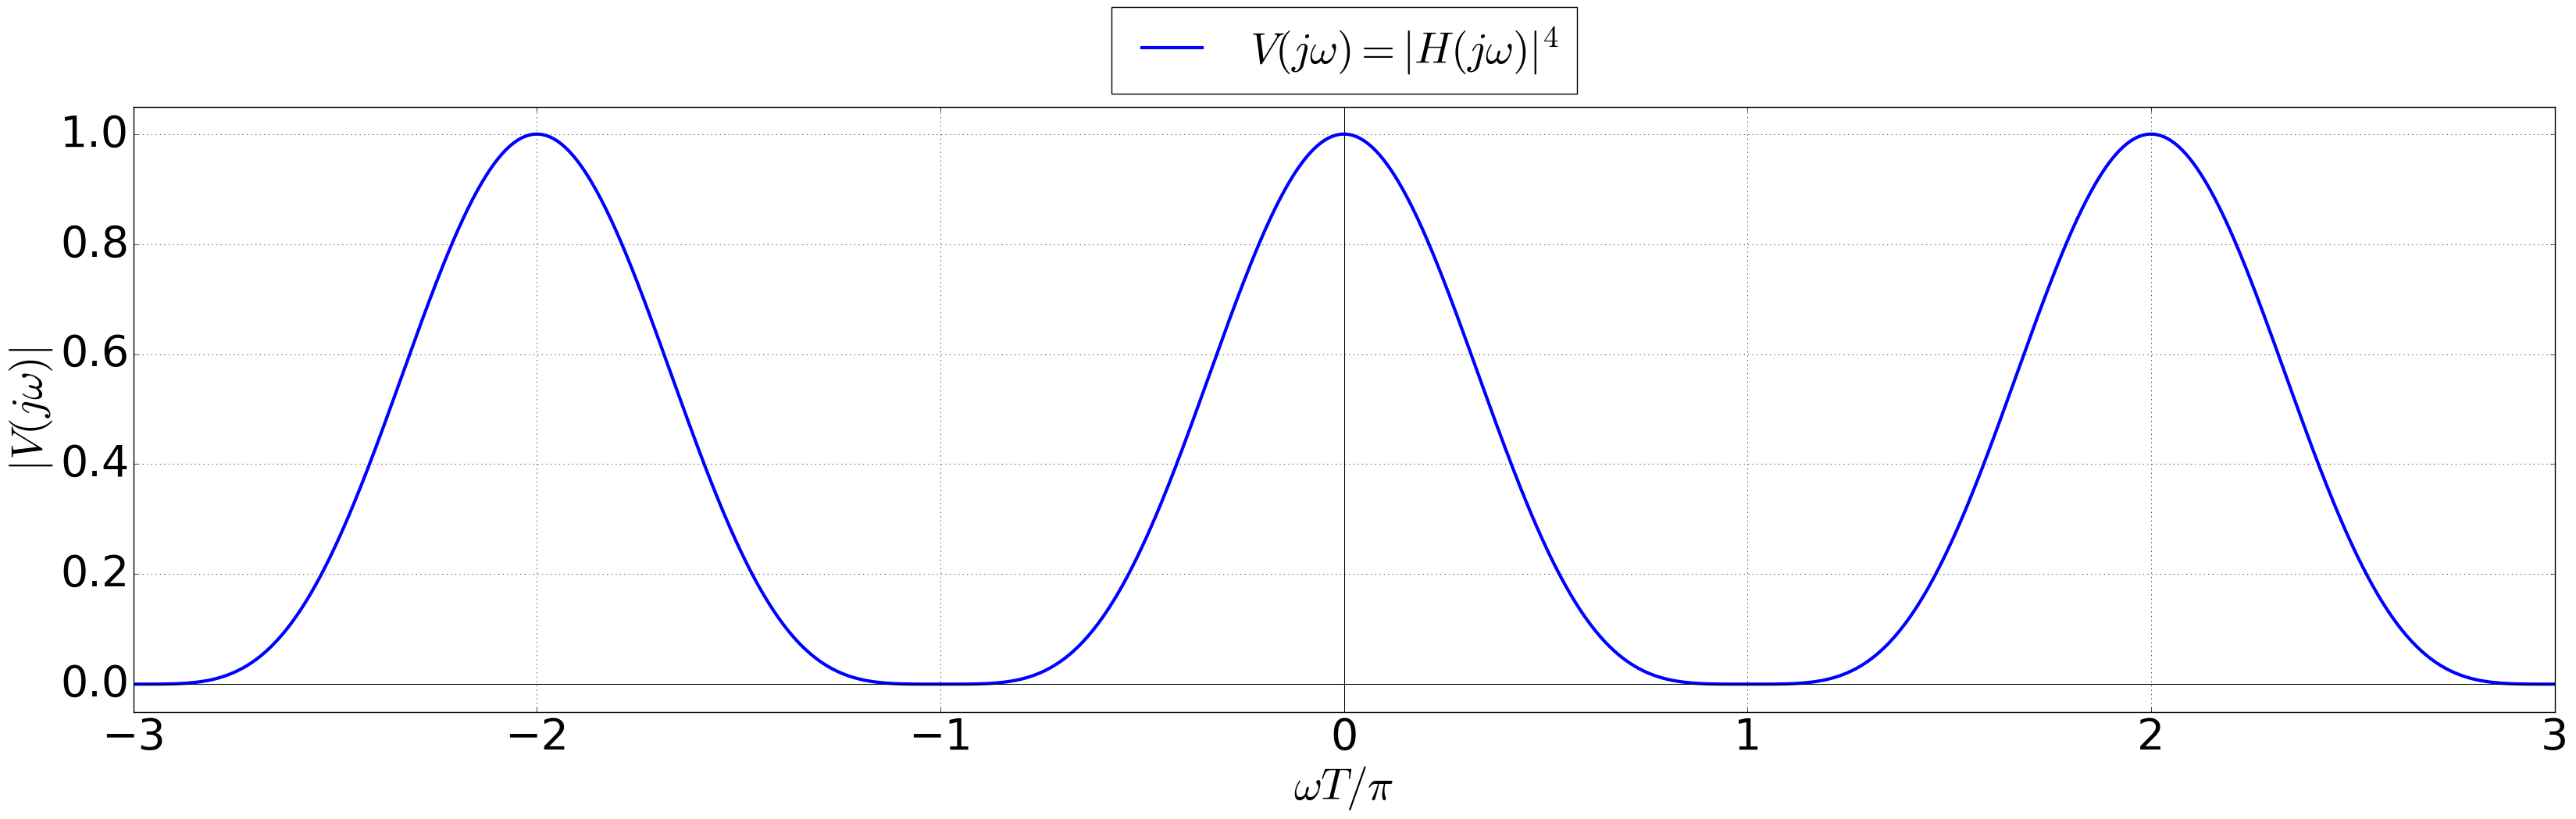

In [9]:
@interact(log2_N=IntSlider(min=0, max=10, step=1, value=2))
def plotV(log2_N):
    exponent = 2**log2_N
    V = np.power(H, exponent)
    plt.axvline(lw=0.75, c='k')
    hand =  plt.plot(wT/pi, np.abs(V), 'b', lw=3,
                     label=r'$V(j\omega) = |H(j\omega)|^{'+ repr(exponent) + r'}$')
    plt.axhline(lw=0.75, c='k')
    setLabels(r'$\omega T/\pi$', r'$|V(j\omega)|$')
    plt.ylim((-0.05, 1.05))
    plt.grid(True)          
    plt.legend(handles=hand, loc='upper center', 
               bbox_to_anchor=(0.5, 1.2), fontsize='medium')

#### Warum dieses Ergebnis?
Die ursprüngliche Impulsantwort $h(t)$ sorgt für eine gewichtete Mittelung der Eingangssignalwerte $x(t)$ und $x(t-T)$. Die Gewichtungsfaktoren sind beide gleich $1/2$. Dies entspricht einem diskreten Rechteckprofil. Die
Hintereinanderschaltung $g(t)$ ist wieder eine gewichtete Mittelung und die Form der Gewichtungsfaktoren ist durch die Faltung ein diskretes Dreieckprofil.  
Wird diese Kaskadierung wiederholt, entsteht ein Filter mit zunehmend längerer Impulsantwort, deren Gewichtungsfaktoren im Grenzfall einem Gaußprofil folgen. Die Fouriertransformierte des diskreten Gaußprofils ist ein kontinuierliches, periodisches Gaußprofil, weshalb die Übertragungsfunktion mit steigender Anzahl kaskadierter Systeme ebenfalls zunehmend gaußförmiger wird.  

In Aufgabe 7 wird als diskretes Äquivalent ein sehr ähnliches System behandelt.